# Snake

In [1]:
import environments_fully_observable 
import environments_partially_observable
import numpy as np
from  tqdm import trange
import matplotlib.pyplot as plt
import random
import tensorflow as tf
tf.random.set_seed(0)
random.seed(0)
np.random.seed(0)

import DQN
import AStar_Heuristic

## Environment definition

In [2]:
def display_boards(env, n=5):
    
    fig,axs=plt.subplots(1,min(len(env.boards), n), figsize=(10,2))
    for ax, board in zip(axs, env.boards):
        ax.get_yaxis().set_visible(False)
        ax.get_xaxis().set_visible(False)
        ax.imshow(board, origin="lower")

def to_channels(state):    
    num_boards = state.shape[0]
    board_dim = state.shape[1]
    return np.transpose(state, (0,3,1,2)).reshape(num_boards, 4, board_dim, board_dim)


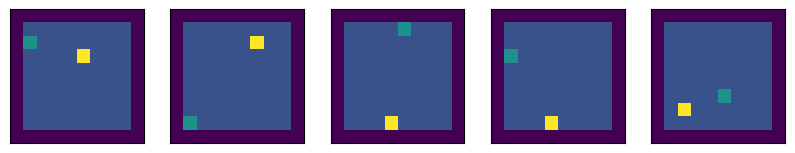

In [3]:
%matplotlib inline
# function to standardize getting an env for the whole notebook
def get_env(n=100, size = 15):
    # n is the number of boards that you want to simulate parallely
    # size is the size of each board, also considering the borders
    # mask for the partially observable, is the size of the local neighborhood
    e = environments_fully_observable.OriginalSnakeEnvironment(n, size)
    # e = environments_partially_observable.OriginalSnakeEnvironment(n, size, 2)
    return e
env_ = get_env(n=100, size=10)
GAMMA = .9
ITERATIONS = 2000

display_boards(env_, 5)

## Model


GPU is not available. Switching to CPU.


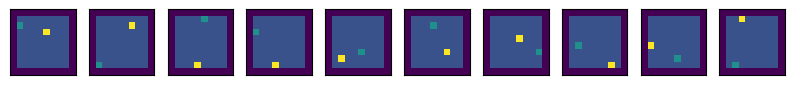

In [4]:
input_shape = to_channels(env_.to_state()).shape[1:]

DQN_agent = DQN.DQNAgent(input_shape= input_shape, num_actions= 4, gamma= GAMMA)

if tf.config.list_physical_devices('GPU'):
    print('GPU is available.')
else:
    print('GPU is not available. Switching to CPU.')

display_boards(env_, 10)


## Training

In [5]:
DQN_agent.train(env_, ITERATIONS, 1024)

4/4 [==============================] - 0s 3ms/step
Epoch 1/2000 => loss: 0.06959887593984604, Reward Mean: -0.006000000052154064
7/7 [==============================] - 0s 2ms/step
Epoch 2/2000 => loss: 0.018707793205976486, Reward Mean: -0.01400000136345625
10/10 [==============================] - 0s 2ms/step
Epoch 3/2000 => loss: 0.0031325609888881445, Reward Mean: -0.01400000136345625
13/13 [==============================] - 0s 2ms/step
Epoch 4/2000 => loss: 0.010056755505502224, Reward Mean: -0.009999999776482582
16/16 [==============================] - 0s 2ms/step
Epoch 5/2000 => loss: 0.003462338587269187, Reward Mean: -0.007000000681728125
19/19 [==============================] - 0s 2ms/step
Epoch 6/2000 => loss: 0.009196983650326729, Reward Mean: -0.007000000681728125
22/22 [==============================] - 0s 2ms/step
Epoch 7/2000 => loss: 0.003963438328355551, Reward Mean: -0.014999999664723873
25/25 [==============================] - 0s 2ms/step
Epoch 8/2000 => loss: 0.00890

In [ ]:
def DQN_execute(agent, steps, env):
    rewards = np.zeros(env.n_boards, dtype=float)
    for step in trange(steps):
        state = env.to_state()
        # Select actions using the DQN agent
        actions = agent.select_actions(state).reshape(-1,1)
        # Move in the environment and get rewards
        rewards = rewards + env_.move(actions)
        display_boards(env, 10)


In [ ]:
def play(env, agent, steps=1000):
    with tf.device('/GPU:0'):
        # load the weights
        # self.load_weights(WEIGHT_PATH+"q_model.h5", WEIGHT_PATH+"v_model.h5") 
        fruits = np.zeros(env.n_boards, dtype=int)

        rewards = np.zeros(env.n_boards, dtype=float)[:,None]
        for _ in trange(steps):
            print("iteration: ", _)
                # update the coordination of fruits in each board
                # fruit_before = np.argwhere(env.boards == env.FRUIT)
            state = env.to_state()
            actions = agent.select_actions_exploitation(state).reshape(-1, 1)
            reward = env.move(actions)
                # fruit_after = np.argwhere(env.boards == env.FRUIT)
                # diff = [np.array_equal(fruit_before[i], fruit_after[i]) for i in range(env.n_boards)]
                # increment the fruit count in boards that have different fruit locations
                # fruits = np.array([fruits[i] + 1 if not diff[i] else fruits[i] for i in range(env.n_boards)])
                
                # print(fruits)

            rewards = rewards + reward
            print("rewards: ", rewards)
            display_boards(env, 5)

  0%|          | 0/100 [00:00<?, ?it/s]

iteration:  0


  2%|▏         | 2/100 [00:00<00:05, 16.86it/s]

q_values:  [[0.07332955 0.17173319 0.19787274 0.18178153]
 [0.21605328 0.2538144  0.18006554 0.19592658]]
actions:  [2 1]
rewards:  tf.Tensor(
[[0.]
 [0.]], shape=(2, 1), dtype=float32)
iteration:  1
q_values:  [[0.1630514  0.19913374 0.23567791 0.21342033]
 [0.23470412 0.2807214  0.20228796 0.21885827]]
actions:  [2 1]
rewards:  tf.Tensor(
[[0.]
 [0.]], shape=(2, 1), dtype=float32)
iteration:  2
q_values:  [[0.18386713 0.22857797 0.27347884 0.24422164]
 [0.2758249  0.31540388 0.2364778  0.24018888]]
actions:  [2 1]
rewards:  tf.Tensor(
[[0.]
 [0.]], shape=(2, 1), dtype=float32)
iteration:  3


  4%|▍         | 4/100 [00:00<00:05, 17.75it/s]

q_values:  [[0.24027975 0.26001328 0.33081713 0.31324774]
 [0.31323934 0.3278263  0.24356826 0.2823091 ]]
actions:  [2 1]
rewards:  tf.Tensor(
[[0.]
 [0.]], shape=(2, 1), dtype=float32)
iteration:  4


  6%|▌         | 6/100 [00:00<00:05, 17.72it/s]

q_values:  [[0.27615574 0.3091676  0.41132286 0.3640652 ]
 [0.37589246 0.34908944 0.29319307 0.30825335]]
actions:  [2 0]
rewards:  tf.Tensor(
[[0.]
 [0.]], shape=(2, 1), dtype=float32)
iteration:  5
q_values:  [[0.35676426 0.3827791  0.46181074 0.4330285 ]
 [0.39118776 0.4210962  0.3408786  0.33586633]]
actions:  [2 1]
rewards:  tf.Tensor(
[[0.]
 [0.]], shape=(2, 1), dtype=float32)
iteration:  6
q_values:  [[0.40778068 0.4104713  0.48113155 0.5067295 ]
 [0.46834102 0.43095997 0.34355104 0.39260167]]
actions:  [3 0]
rewards:  tf.Tensor(
[[0.]
 [0.]], shape=(2, 1), dtype=float32)
iteration:  7


  8%|▊         | 8/100 [00:00<00:05, 17.75it/s]

q_values:  [[0.44460338 0.4354225  0.5042933  0.5120185 ]
 [0.48909718 0.4626239  0.43465966 0.44117317]]
actions:  [3 0]
rewards:  tf.Tensor(
[[0.]
 [0.]], shape=(2, 1), dtype=float32)
iteration:  8


 10%|█         | 10/100 [00:00<00:05, 17.90it/s]

q_values:  [[0.47605902 0.4522897  0.572172   0.4420479 ]
 [0.4118537  0.5248249  0.41884243 0.43627864]]
actions:  [2 1]
rewards:  tf.Tensor(
[[0.5]
 [0.5]], shape=(2, 1), dtype=float32)
iteration:  9
q_values:  [[0.12436113 0.11543419 0.02447861 0.0805418 ]
 [0.09728719 0.14578658 0.25877753 0.19043057]]
actions:  [0 2]
rewards:  tf.Tensor(
[[0.3]
 [0.5]], shape=(2, 1), dtype=float32)
iteration:  10
q_values:  [[0.2120569  0.23596877 0.17275056 0.19588485]
 [0.16797952 0.2405693  0.32099187 0.3655959 ]]
actions:  [1 3]
rewards:  tf.Tensor(
[[0.3]
 [0.5]], shape=(2, 1), dtype=float32)
iteration:  11
q_values:  [[0.23321655 0.2423575  0.19135319 0.20290533]
 [0.27345234 0.22601755 0.32954872 0.4675898 ]]
actions:  [1 3]
rewards:  tf.Tensor(
[[0.3]
 [0.5]], shape=(2, 1), dtype=float32)


 12%|█▏        | 12/100 [00:00<00:04, 18.02it/s]

iteration:  12


 14%|█▍        | 14/100 [00:00<00:04, 18.02it/s]

q_values:  [[0.27611768 0.25755334 0.19135745 0.21745291]
 [0.36924627 0.34012923 0.4685237  0.52135986]]
actions:  [0 3]
rewards:  tf.Tensor(
[[0.3]
 [0.5]], shape=(2, 1), dtype=float32)
iteration:  13
q_values:  [[0.32966205 0.31460083 0.23428956 0.23488224]
 [0.40931344 0.33960554 0.5669369  0.53242207]]
actions:  [0 2]
rewards:  tf.Tensor(
[[0.3]
 [1. ]], shape=(2, 1), dtype=float32)
iteration:  14
q_values:  [[ 0.41647467  0.3947661   0.30615625  0.32080215]
 [-0.0932033   0.10155132  0.07341515  0.03199613]]
actions:  [0 1]
rewards:  tf.Tensor(
[[0.3]
 [1. ]], shape=(2, 1), dtype=float32)
iteration:  15


 16%|█▌        | 16/100 [00:00<00:04, 18.15it/s]

q_values:  [[ 0.45231947  0.47963136  0.3631093   0.36348528]
 [-0.21167594  0.00385768 -0.05538547 -0.11199067]]
actions:  [1 1]
rewards:  tf.Tensor(
[[0.3]
 [1. ]], shape=(2, 1), dtype=float32)
iteration:  16
q_values:  [[ 0.5174271   0.49890083  0.37188047  0.426158  ]
 [-0.15239313 -0.02153785 -0.04727669 -0.1069613 ]]
actions:  [0 1]
rewards:  tf.Tensor(
[[0.3]
 [1. ]], shape=(2, 1), dtype=float32)
iteration:  17


 18%|█▊        | 18/100 [00:01<00:06, 12.78it/s]C:\Users\user\AppData\Local\Temp\ipykernel_25704\49746459.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig,axs=plt.subplots(1,min(len(env.boards), n), figsize=(10,2))
 20%|██        | 20/100 [00:01<00:05, 14.09it/s]

q_values:  [[ 0.5632037   0.5594179   0.45315948  0.4794252 ]
 [-0.08333586 -0.07312638 -0.02725757 -0.02982437]]
actions:  [0 2]
rewards:  tf.Tensor(
[[0.3]
 [1. ]], shape=(2, 1), dtype=float32)
iteration:  18
q_values:  [[ 0.4663797   0.59466946  0.49402118  0.45438734]
 [-0.16048728 -0.08130766 -0.04828542  0.06674001]]
actions:  [1 3]
rewards:  tf.Tensor(
[[0.8]
 [1. ]], shape=(2, 1), dtype=float32)
iteration:  19
q_values:  [[ 0.02167341  0.11007831  0.13198894  0.05219623]
 [-0.05832582 -0.04706255 -0.05786172  0.0848625 ]]
actions:  [2 3]
rewards:  tf.Tensor(
[[0.8]
 [1. ]], shape=(2, 1), dtype=float32)
iteration:  20
q_values:  [[ 0.04076113  0.11990242  0.11012125  0.11759648]
 [-0.00954838  0.00821619 -0.00084699  0.11671641]]
actions:  [1 3]
rewards:  tf.Tensor(
[[0.8]
 [1. ]], shape=(2, 1), dtype=float32)
iteration:  21


 24%|██▍       | 24/100 [00:01<00:04, 15.45it/s]

q_values:  [[ 0.02379261  0.09590451  0.06399153  0.02651482]
 [-0.00831822 -0.06183985  0.02361998  0.06370161]]
actions:  [1 3]
rewards:  tf.Tensor(
[[0.8]
 [1. ]], shape=(2, 1), dtype=float32)
iteration:  22
q_values:  [[0.009434   0.00387396 0.08799814 0.06686518]
 [0.00226792 0.00398096 0.07616717 0.10540573]]
actions:  [2 3]
rewards:  tf.Tensor(
[[0.8]
 [1. ]], shape=(2, 1), dtype=float32)
iteration:  23
q_values:  [[-0.05162835  0.0367395   0.02407544  0.12596604]
 [ 0.09648057  0.06160649  0.1471      0.1912743 ]]
actions:  [3 3]
rewards:  tf.Tensor(
[[0.8]
 [1. ]], shape=(2, 1), dtype=float32)
iteration:  24
q_values:  [[0.10336389 0.01694737 0.09958827 0.1615443 ]
 [0.09508581 0.04158834 0.14850922 0.12586927]]
actions:  [3 2]
rewards:  tf.Tensor(
[[0.8]
 [1. ]], shape=(2, 1), dtype=float32)
iteration:  25


 28%|██▊       | 28/100 [00:01<00:04, 16.64it/s]

q_values:  [[0.1433899  0.0494219  0.16885853 0.25031412]
 [0.10594633 0.26507798 0.37950632 0.2668875 ]]
actions:  [3 2]
rewards:  tf.Tensor(
[[0.8]
 [1. ]], shape=(2, 1), dtype=float32)
iteration:  26
q_values:  [[0.12828647 0.05554318 0.26869103 0.25146472]
 [0.22721756 0.42361632 0.5171288  0.28217956]]
actions:  [2 2]
rewards:  tf.Tensor(
[[0.8]
 [1. ]], shape=(2, 1), dtype=float32)
iteration:  27
q_values:  [[0.13461384 0.18327723 0.27683127 0.28948703]
 [0.3649771  0.43050092 0.57816774 0.31318322]]
actions:  [3 2]
rewards:  tf.Tensor(
[[0.8]
 [1.5]], shape=(2, 1), dtype=float32)
iteration:  28
q_values:  [[0.2596569  0.11542539 0.39690974 0.44799334]
 [0.18424931 0.169329   0.07822158 0.09650885]]
actions:  [3 0]
rewards:  tf.Tensor(
[[0.8]
 [1.3]], shape=(2, 1), dtype=float32)
iteration:  29


 32%|███▏      | 32/100 [00:01<00:04, 16.09it/s]

q_values:  [[0.26845646 0.23460908 0.4761469  0.44546214]
 [0.38470653 0.36618134 0.27838692 0.2853844 ]]
actions:  [2 0]
rewards:  tf.Tensor(
[[0.8]
 [1.3]], shape=(2, 1), dtype=float32)
iteration:  30
q_values:  [[0.42365056 0.41753113 0.5828526  0.5343756 ]
 [0.44844693 0.45540714 0.32887045 0.35396037]]
actions:  [2 1]
rewards:  tf.Tensor(
[[0.8]
 [1.3]], shape=(2, 1), dtype=float32)
iteration:  31
q_values:  [[0.45515794 0.38248664 0.43235496 0.5903183 ]
 [0.5305304  0.4190484  0.382159   0.4328861 ]]
actions:  [3 0]
rewards:  tf.Tensor(
[[1.3]
 [1.3]], shape=(2, 1), dtype=float32)
iteration:  32
q_values:  [[0.30774054 0.21563344 0.10805825 0.2332319 ]
 [0.59201074 0.46443513 0.42552167 0.4599074 ]]
actions:  [0 0]
rewards:  tf.Tensor(
[[1.3]
 [1.8]], shape=(2, 1), dtype=float32)
iteration:  33


 36%|███▌      | 36/100 [00:02<00:03, 16.98it/s]

q_values:  [[0.2641733  0.21452413 0.08793425 0.15894976]
 [0.3249474  0.3242936  0.40936026 0.4743208 ]]
actions:  [0 3]
rewards:  tf.Tensor(
[[1.3]
 [1.8]], shape=(2, 1), dtype=float32)
iteration:  34
q_values:  [[0.28319094 0.17414424 0.1407752  0.17686155]
 [0.3405756  0.26973155 0.475119   0.46327657]]
actions:  [0 2]
rewards:  tf.Tensor(
[[1.8]
 [1.8]], shape=(2, 1), dtype=float32)
iteration:  35
q_values:  [[0.2060347  0.14151645 0.21318506 0.20536402]
 [0.34921962 0.40844992 0.512781   0.5857124 ]]
actions:  [2 3]
rewards:  tf.Tensor(
[[1.5999999]
 [2.3      ]], shape=(2, 1), dtype=float32)
iteration:  36
q_values:  [[ 0.31629953  0.36155283  0.4460456   0.360129  ]
 [ 0.05615139  0.10001715  0.10144552 -0.03671652]]
actions:  [2 2]
rewards:  tf.Tensor(
[[1.5999999]
 [2.3      ]], shape=(2, 1), dtype=float32)
iteration:  37


 40%|████      | 40/100 [00:02<00:03, 17.41it/s]

q_values:  [[ 0.39087236  0.39485794  0.5037114   0.4532255 ]
 [ 0.01697272  0.15551458  0.19587453 -0.01180043]]
actions:  [2 2]
rewards:  tf.Tensor(
[[1.5999999]
 [2.3      ]], shape=(2, 1), dtype=float32)
iteration:  38
q_values:  [[ 0.4602072   0.4579563   0.5370384   0.5132453 ]
 [-0.01304062  0.12773243  0.01717259 -0.13397309]]
actions:  [2 1]
rewards:  tf.Tensor(
[[1.5999999]
 [2.3      ]], shape=(2, 1), dtype=float32)
iteration:  39
q_values:  [[ 0.46546423  0.5136239   0.4591419   0.546348  ]
 [ 0.10693392  0.20426999  0.05581109 -0.0752242 ]]
actions:  [3 1]
rewards:  tf.Tensor(
[[2.1]
 [2.3]], shape=(2, 1), dtype=float32)
iteration:  40
q_values:  [[0.20069769 0.06954445 0.03703773 0.03636779]
 [0.07517239 0.2288265  0.06469892 0.03512597]]
actions:  [0 1]
rewards:  tf.Tensor(
[[2.1]
 [2.3]], shape=(2, 1), dtype=float32)
iteration:  41


 44%|████▍     | 44/100 [00:02<00:03, 17.88it/s]

q_values:  [[ 0.20942618  0.18126078 -0.01726807  0.06820704]
 [ 0.1468061   0.25209993  0.03104058  0.02879861]]
actions:  [0 1]
rewards:  tf.Tensor(
[[2.1]
 [2.3]], shape=(2, 1), dtype=float32)
iteration:  42
q_values:  [[0.21444269 0.23230626 0.04366168 0.09475835]
 [0.1622111  0.4479542  0.14029562 0.11580998]]
actions:  [1 1]
rewards:  tf.Tensor(
[[2.1]
 [2.3]], shape=(2, 1), dtype=float32)
iteration:  43
q_values:  [[0.22873497 0.27231824 0.11929441 0.04243846]
 [0.27236742 0.52888244 0.19084957 0.18357797]]
actions:  [1 1]
rewards:  tf.Tensor(
[[2.1]
 [2.3]], shape=(2, 1), dtype=float32)
iteration:  44
q_values:  [[0.32711738 0.2632508  0.15057491 0.16485193]
 [0.28789487 0.5546547  0.1923946  0.26518646]]
actions:  [0 1]
rewards:  tf.Tensor(
[[2.1]
 [2.8]], shape=(2, 1), dtype=float32)
iteration:  45


 48%|████▊     | 48/100 [00:02<00:02, 18.13it/s]

q_values:  [[ 0.34578502  0.38913554  0.19715098  0.2733377 ]
 [-0.17165317 -0.0632166  -0.17063038 -0.08311526]]
actions:  [1 1]
rewards:  tf.Tensor(
[[2.1]
 [2.7]], shape=(2, 1), dtype=float32)
iteration:  46
q_values:  [[ 0.43190074  0.42352843  0.31809974  0.28617576]
 [-0.07520506 -0.02206442 -0.0519391   0.03774539]]
actions:  [0 3]
rewards:  tf.Tensor(
[[2.1]
 [2.5]], shape=(2, 1), dtype=float32)
iteration:  47
q_values:  [[0.48190507 0.54678315 0.34399736 0.38446444]
 [0.07157957 0.03585541 0.09048337 0.17244926]]
actions:  [1 3]
rewards:  tf.Tensor(
[[2.1]
 [2.5]], shape=(2, 1), dtype=float32)
iteration:  48
q_values:  [[0.50613266 0.49874634 0.35533944 0.3498346 ]
 [0.09815177 0.00071545 0.08517104 0.21587895]]
actions:  [0 3]
rewards:  tf.Tensor(
[[2.6]
 [2.5]], shape=(2, 1), dtype=float32)
iteration:  49


 52%|█████▏    | 52/100 [00:03<00:03, 14.22it/s]

q_values:  [[0.0266092  0.18506476 0.11968092 0.07312053]
 [0.1474917  0.00171536 0.11472548 0.2214785 ]]
actions:  [1 3]
rewards:  tf.Tensor(
[[2.6]
 [2.5]], shape=(2, 1), dtype=float32)
iteration:  50
q_values:  [[-0.03807728  0.15452954  0.1433598   0.0500285 ]
 [ 0.24980727  0.08049099  0.17286491  0.29754913]]
actions:  [1 3]
rewards:  tf.Tensor(
[[2.6]
 [2.5]], shape=(2, 1), dtype=float32)
iteration:  51
q_values:  [[-0.06266247  0.11245935  0.12923141 -0.0116393 ]
 [ 0.30112377  0.10638103  0.17249708  0.2758992 ]]
actions:  [2 0]
rewards:  tf.Tensor(
[[2.6]
 [2.5]], shape=(2, 1), dtype=float32)
iteration:  52
q_values:  [[0.07227774 0.20170324 0.26339003 0.16322728]
 [0.36288613 0.26595455 0.14220072 0.31017202]]
actions:  [2 0]
rewards:  tf.Tensor(
[[2.6]
 [2.5]], shape=(2, 1), dtype=float32)
iteration:  53


 56%|█████▌    | 56/100 [00:03<00:02, 16.12it/s]

q_values:  [[0.1844011  0.26533407 0.3682672  0.2775805 ]
 [0.4592636  0.35767797 0.2516187  0.4464355 ]]
actions:  [2 0]
rewards:  tf.Tensor(
[[3.1]
 [2.5]], shape=(2, 1), dtype=float32)
iteration:  54
q_values:  [[-0.04207286 -0.0122233  -0.09801233 -0.01231008]
 [ 0.37489733  0.3031276   0.32938427  0.49285144]]
actions:  [1 3]
rewards:  tf.Tensor(
[[3.1]
 [3. ]], shape=(2, 1), dtype=float32)
iteration:  55
q_values:  [[-0.06021044 -0.1185714  -0.19837576 -0.04694678]
 [ 0.45208547  0.25787327  0.3219117   0.37920195]]
actions:  [3 0]
rewards:  tf.Tensor(
[[2.8999999]
 [3.5      ]], shape=(2, 1), dtype=float32)
iteration:  56
q_values:  [[ 0.25176167  0.20314479  0.17100528  0.22794254]
 [-0.01180981 -0.04362322 -0.05671149 -0.0140735 ]]
actions:  [0 0]
rewards:  tf.Tensor(
[[2.8999999]
 [3.5      ]], shape=(2, 1), dtype=float32)
iteration:  57


 60%|██████    | 60/100 [00:03<00:02, 17.27it/s]

q_values:  [[ 0.27574596  0.22203468  0.19917     0.28456268]
 [-0.10261089 -0.10001863 -0.1680977  -0.04170261]]
actions:  [3 3]
rewards:  tf.Tensor(
[[2.8999999]
 [3.5      ]], shape=(2, 1), dtype=float32)
iteration:  58
q_values:  [[ 0.3199703   0.2604191   0.22172406  0.29231036]
 [-0.11413649 -0.09956552 -0.10446694 -0.1274985 ]]
actions:  [0 1]
rewards:  tf.Tensor(
[[2.8999999]
 [3.3      ]], shape=(2, 1), dtype=float32)
iteration:  59
q_values:  [[0.3630658  0.29896715 0.2643777  0.35981473]
 [0.19270279 0.2531781  0.20469463 0.18549106]]
actions:  [0 1]
rewards:  tf.Tensor(
[[2.8999999]
 [3.3      ]], shape=(2, 1), dtype=float32)
iteration:  60
q_values:  [[0.4273448  0.33223403 0.32025436 0.40714502]
 [0.19583388 0.2788878  0.21431643 0.19427653]]
actions:  [0 1]
rewards:  tf.Tensor(
[[2.8999999]
 [3.3      ]], shape=(2, 1), dtype=float32)
iteration:  61
q_values:  [[0.4697263  0.36858884 0.37814373 0.47630414]
 [0.24907537 0.3428568  0.2757222  0.2297107 ]]
actions:  [3 1]
re

 64%|██████▍   | 64/100 [00:03<00:01, 18.03it/s]

iteration:  62
q_values:  [[0.5806089  0.45846742 0.44880936 0.49508762]
 [0.3218437  0.41309407 0.3271884  0.2863866 ]]
actions:  [0 1]
rewards:  tf.Tensor(
[[3.3999999]
 [3.3      ]], shape=(2, 1), dtype=float32)
iteration:  63
q_values:  [[0.25499803 0.41401473 0.29880908 0.29492354]
 [0.4081448  0.47082105 0.39979076 0.34838465]]
actions:  [1 1]
rewards:  tf.Tensor(
[[3.3999999]
 [3.3      ]], shape=(2, 1), dtype=float32)
iteration:  64
q_values:  [[0.21819088 0.31788817 0.45514107 0.23548795]
 [0.48909718 0.4626239  0.43465966 0.44117317]]
actions:  [2 0]
rewards:  tf.Tensor(
[[3.3999999]
 [3.3      ]], shape=(2, 1), dtype=float32)
iteration:  65
q_values:  [[0.34725708 0.4896356  0.45285562 0.36400446]
 [0.4118537  0.5248249  0.41884243 0.43627864]]
actions:  [1 1]


 68%|██████▊   | 68/100 [00:04<00:01, 18.36it/s]

rewards:  tf.Tensor(
[[3.8999999]
 [3.8      ]], shape=(2, 1), dtype=float32)
iteration:  66
q_values:  [[-0.00312559  0.07853567  0.09700528  0.06070651]
 [ 0.12691526  0.1618164   0.29899684  0.2823069 ]]
actions:  [2 2]
rewards:  tf.Tensor(
[[3.8999999]
 [3.8      ]], shape=(2, 1), dtype=float32)
iteration:  67
q_values:  [[0.01860023 0.15621744 0.20177463 0.16670255]
 [0.15008143 0.20880659 0.31728405 0.38574108]]
actions:  [2 3]
rewards:  tf.Tensor(
[[3.8999999]
 [3.8      ]], shape=(2, 1), dtype=float32)
iteration:  68
q_values:  [[-0.02175281  0.1862745   0.17011201  0.15377001]
 [ 0.30309513  0.19594827  0.31129506  0.49832383]]
actions:  [1 3]
rewards:  tf.Tensor(
[[3.8999999]
 [3.8      ]], shape=(2, 1), dtype=float32)
iteration:  69
q_values:  [[0.12275667 0.13857621 0.15750504 0.21758457]
 [0.434986   0.35975948 0.3980631  0.5723875 ]]
actions:  [3 3]
rewards:  tf.Tensor(
[[3.6999998]
 [4.3      ]], shape=(2, 1), dtype=float32)


 72%|███████▏  | 72/100 [00:04<00:01, 18.44it/s]

iteration:  70
q_values:  [[0.3184173  0.3769874  0.47514397 0.4403493 ]
 [0.14770639 0.04717699 0.15722138 0.23586345]]
actions:  [2 3]
rewards:  tf.Tensor(
[[3.6999998]
 [4.3      ]], shape=(2, 1), dtype=float32)
iteration:  71
q_values:  [[0.39789197 0.41577065 0.54406387 0.5126654 ]
 [0.15307562 0.16785671 0.33714208 0.3131409 ]]
actions:  [2 2]
rewards:  tf.Tensor(
[[3.6999998]
 [4.3      ]], shape=(2, 1), dtype=float32)
iteration:  72
q_values:  [[0.5032933  0.42179206 0.45577744 0.60517734]
 [0.17750995 0.43787485 0.43018436 0.43428063]]
actions:  [3 1]
rewards:  tf.Tensor(
[[4.2]
 [4.3]], shape=(2, 1), dtype=float32)
iteration:  73


 76%|███████▌  | 76/100 [00:04<00:01, 18.59it/s]

q_values:  [[0.47043958 0.3558515  0.39912602 0.48537776]
 [0.07860938 0.31723836 0.34388697 0.30841923]]
actions:  [3 2]
rewards:  tf.Tensor(
[[4.2]
 [4.3]], shape=(2, 1), dtype=float32)
iteration:  74
q_values:  [[0.41739148 0.404618   0.39371938 0.37068808]
 [0.19163084 0.21334298 0.30559316 0.3938958 ]]
actions:  [0 3]
rewards:  tf.Tensor(
[[4.2]
 [4.3]], shape=(2, 1), dtype=float32)
iteration:  75
q_values:  [[0.3834382  0.5191325  0.30431286 0.35989094]
 [0.3703457  0.24924798 0.32145202 0.45974773]]
actions:  [1 3]
rewards:  tf.Tensor(
[[4.7]
 [4.8]], shape=(2, 1), dtype=float32)
iteration:  76
q_values:  [[0.04207272 0.23098817 0.2627423  0.15716666]
 [0.12085456 0.2292923  0.1566521  0.14299808]]
actions:  [2 1]
rewards:  tf.Tensor(
[[4.7      ]
 [4.6000004]], shape=(2, 1), dtype=float32)
iteration:  77


 80%|████████  | 80/100 [00:04<00:01, 18.61it/s]

q_values:  [[0.03173975 0.17669444 0.28834367 0.18978743]
 [0.4525295  0.5324887  0.38421184 0.3872868 ]]
actions:  [2 1]
rewards:  tf.Tensor(
[[4.7      ]
 [4.6000004]], shape=(2, 1), dtype=float32)
iteration:  78
q_values:  [[0.06365838 0.27927813 0.24752383 0.19769217]
 [0.5397861  0.5673266  0.43058935 0.48589337]]
actions:  [1 1]
rewards:  tf.Tensor(
[[4.7      ]
 [4.6000004]], shape=(2, 1), dtype=float32)
iteration:  79
q_values:  [[0.03237379 0.18591332 0.09388985 0.17561561]
 [0.6052703  0.49502373 0.43972906 0.5363112 ]]
actions:  [1 0]
rewards:  tf.Tensor(
[[4.7      ]
 [5.1000004]], shape=(2, 1), dtype=float32)
iteration:  80
q_values:  [[0.08471679 0.12848449 0.15569879 0.27562386]
 [0.28566742 0.44420773 0.38473472 0.3028028 ]]
actions:  [3 1]
rewards:  tf.Tensor(
[[4.5      ]
 [5.1000004]], shape=(2, 1), dtype=float32)
iteration:  81


 84%|████████▍ | 84/100 [00:04<00:00, 18.46it/s]

q_values:  [[0.31564003 0.26741567 0.3139933  0.40150872]
 [0.25443387 0.4857933  0.4527796  0.2956432 ]]
actions:  [3 1]
rewards:  tf.Tensor(
[[4.5      ]
 [5.1000004]], shape=(2, 1), dtype=float32)
iteration:  82
q_values:  [[0.40724227 0.35684314 0.42654863 0.4871841 ]
 [0.28666052 0.3720023  0.5466043  0.36575487]]
actions:  [3 2]
rewards:  tf.Tensor(
[[4.5      ]
 [5.6000004]], shape=(2, 1), dtype=float32)
iteration:  83
q_values:  [[ 0.44148085  0.41708022  0.5404537   0.5729296 ]
 [-0.04687074  0.12164178  0.18189879  0.16842663]]
actions:  [3 2]
rewards:  tf.Tensor(
[[4.5      ]
 [5.6000004]], shape=(2, 1), dtype=float32)
iteration:  84
q_values:  [[ 0.4627325   0.50832     0.57721645  0.58591443]
 [-0.02896763  0.27315968  0.22752197  0.22486766]]
actions:  [3 1]
rewards:  tf.Tensor(
[[4.5      ]
 [5.5000005]], shape=(2, 1), dtype=float32)
iteration:  85


 88%|████████▊ | 88/100 [00:05<00:00, 18.60it/s]

q_values:  [[0.51777864 0.5387674  0.5519471  0.5167261 ]
 [0.15424371 0.3307487  0.37832236 0.31445006]]
actions:  [2 2]
rewards:  tf.Tensor(
[[5.       ]
 [5.5000005]], shape=(2, 1), dtype=float32)
iteration:  86
q_values:  [[0.1412453  0.18891573 0.08792777 0.15963876]
 [0.32432774 0.4343385  0.49333432 0.51930857]]
actions:  [1 3]
rewards:  tf.Tensor(
[[5.       ]
 [5.5000005]], shape=(2, 1), dtype=float32)
iteration:  87
q_values:  [[0.21021168 0.15513566 0.12251611 0.15881167]
 [0.32068494 0.4276526  0.43991745 0.49088898]]
actions:  [0 3]
rewards:  tf.Tensor(
[[5.       ]
 [5.5000005]], shape=(2, 1), dtype=float32)
iteration:  88
q_values:  [[0.2600229  0.17783314 0.10637942 0.22713679]
 [0.37305018 0.45622498 0.5056252  0.45902914]]
actions:  [0 2]
rewards:  tf.Tensor(
[[5.       ]
 [5.5000005]], shape=(2, 1), dtype=float32)
iteration:  89
q_values:  [[0.3192988  0.28429285 0.11816648 0.2624855 ]
 [0.26403442 0.5258195  0.35011622 0.31147704]]
actions:  [0 1]
rewards:  tf.Tenso

 90%|█████████ | 90/100 [00:05<00:00, 18.59it/s]

iteration:  90
q_values:  [[0.4464003  0.33717105 0.23394403 0.36298645]
 [0.1634761  0.5024046  0.21831733 0.22132567]]
actions:  [0 1]
rewards:  tf.Tensor(
[[5.       ]
 [6.0000005]], shape=(2, 1), dtype=float32)


 94%|█████████▍| 94/100 [00:05<00:00, 13.66it/s]

iteration:  91
q_values:  [[ 0.56809694  0.42332876  0.32578763  0.44011584]
 [-0.08350582 -0.0427687  -0.07609106  0.02113342]]
actions:  [0 3]
rewards:  tf.Tensor(
[[5.5      ]
 [5.8000007]], shape=(2, 1), dtype=float32)
iteration:  92
q_values:  [[-0.01056115  0.14014904  0.02532268  0.05271514]
 [ 0.28690615  0.24723834  0.23147891  0.29231855]]
actions:  [1 3]
rewards:  tf.Tensor(
[[5.5      ]
 [5.8000007]], shape=(2, 1), dtype=float32)
iteration:  93
q_values:  [[-0.02881656  0.19327402  0.0847214  -0.01044862]
 [ 0.31331834  0.2624558   0.24373175  0.29484594]]
actions:  [1 0]
rewards:  tf.Tensor(
[[5.5      ]
 [5.8000007]], shape=(2, 1), dtype=float32)
iteration:  94
q_values:  [[-0.06285942  0.11093356  0.05023247 -0.008702  ]
 [ 0.4084013   0.31569797  0.27744865  0.37572268]]
actions:  [1 0]
rewards:  tf.Tensor(
[[5.5      ]
 [5.8000007]], shape=(2, 1), dtype=float32)
iteration:  95


 98%|█████████▊| 98/100 [00:05<00:00, 15.76it/s]

q_values:  [[-0.02484999  0.11447197  0.09193831  0.0045889 ]
 [ 0.45332232  0.36242864  0.33719847  0.44685307]]
actions:  [1 0]
rewards:  tf.Tensor(
[[5.5      ]
 [5.8000007]], shape=(2, 1), dtype=float32)
iteration:  96
q_values:  [[0.02880315 0.12624349 0.15774642 0.07575237]
 [0.47788143 0.3652673  0.39338642 0.53568554]]
actions:  [2 3]
rewards:  tf.Tensor(
[[5.5      ]
 [5.8000007]], shape=(2, 1), dtype=float32)
iteration:  97
q_values:  [[0.01632046 0.21856013 0.27757412 0.26101494]
 [0.5694499  0.40239906 0.42602777 0.5880786 ]]
actions:  [2 3]
rewards:  tf.Tensor(
[[5.5      ]
 [5.8000007]], shape=(2, 1), dtype=float32)
iteration:  98
q_values:  [[0.07768106 0.35794377 0.25155586 0.3332189 ]
 [0.67007494 0.5127143  0.44416845 0.5224906 ]]
actions:  [1 0]
rewards:  tf.Tensor(
[[5.4      ]
 [6.3000007]], shape=(2, 1), dtype=float32)
iteration:  99


100%|██████████| 100/100 [00:05<00:00, 16.71it/s]


q_values:  [[0.26628053 0.40516195 0.39650664 0.39761943]
 [0.12463736 0.15547496 0.10064245 0.16820559]]
actions:  [1 3]
rewards:  tf.Tensor(
[[5.3      ]
 [6.3000007]], shape=(2, 1), dtype=float32)


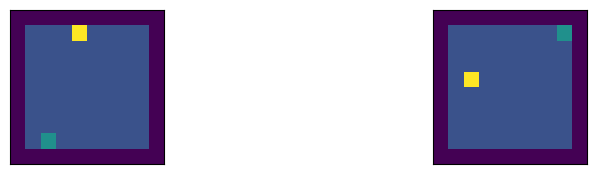

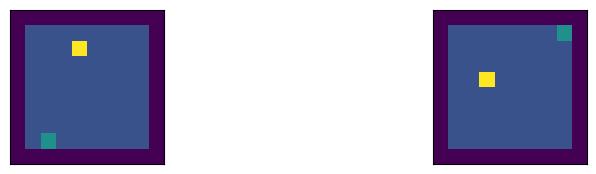

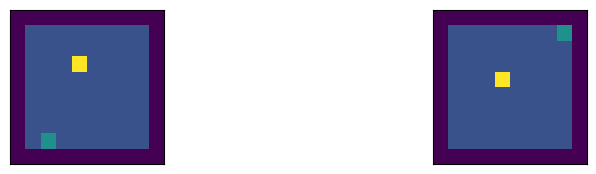

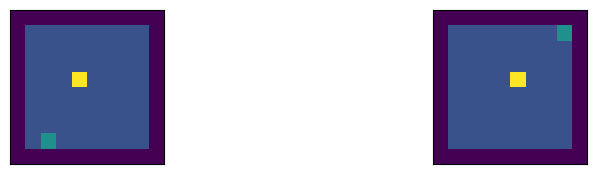

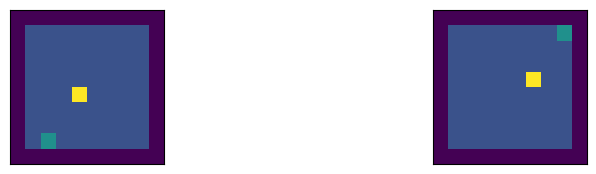

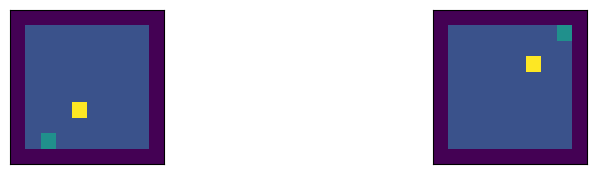

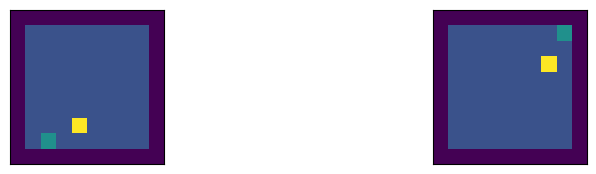

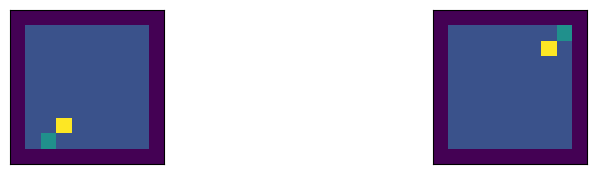

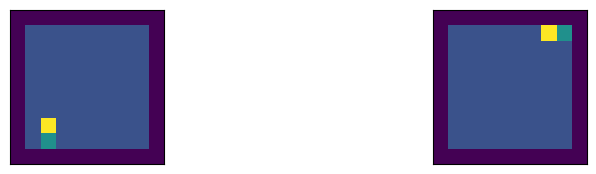

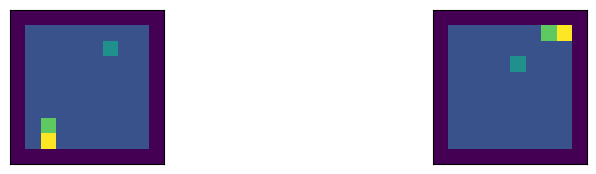

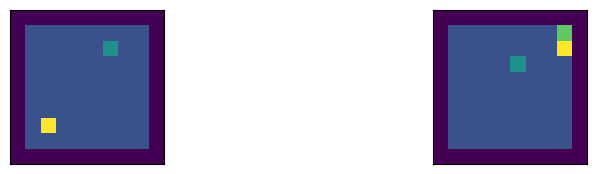

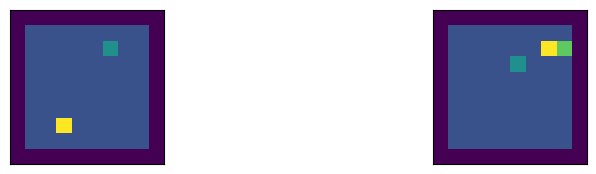

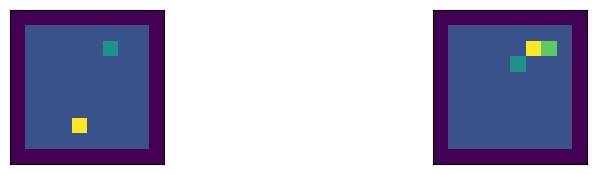

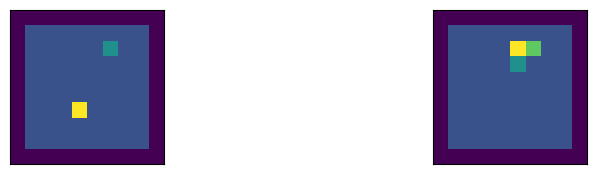

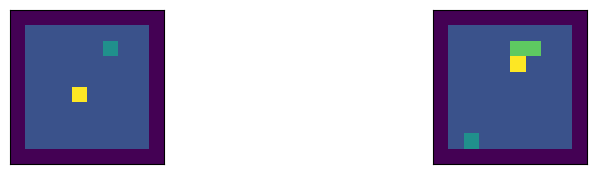

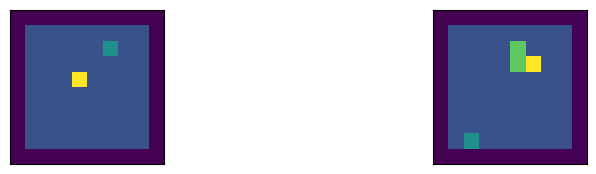

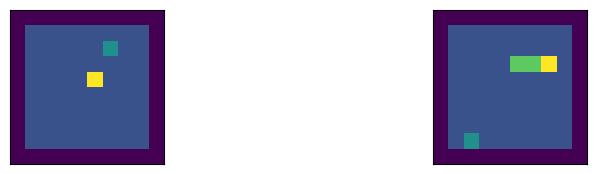

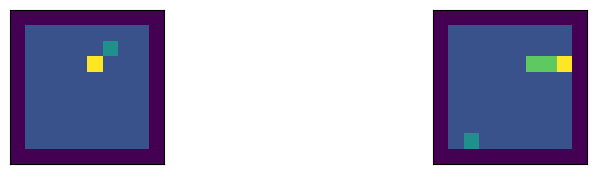

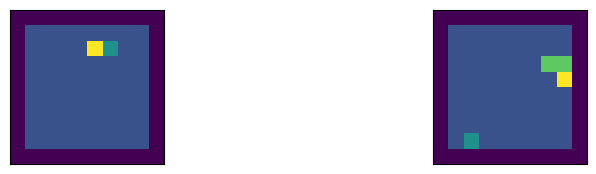

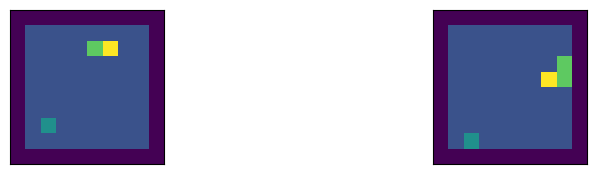

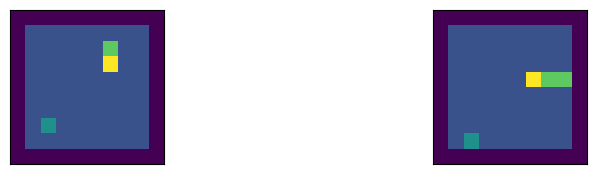

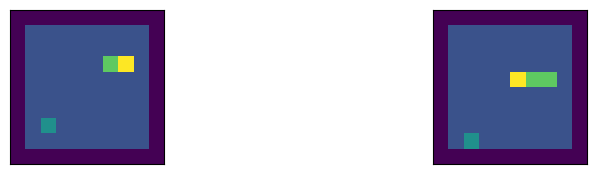

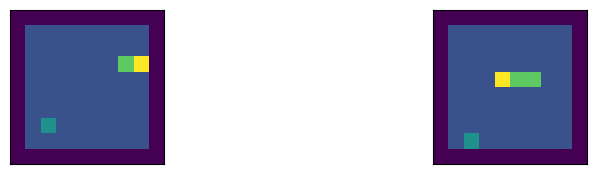

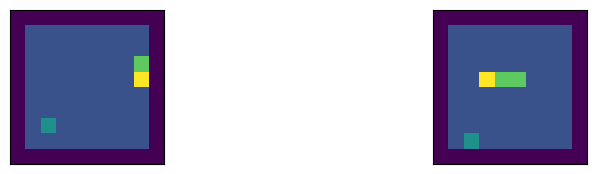

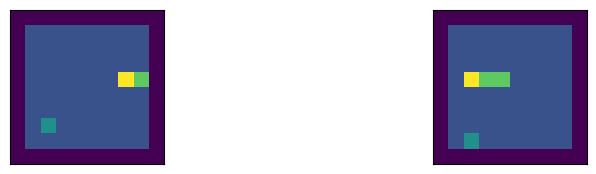

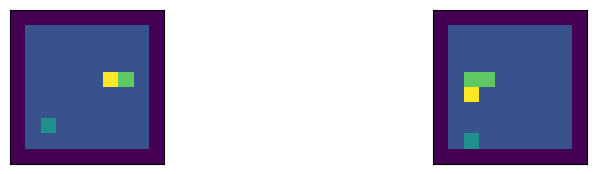

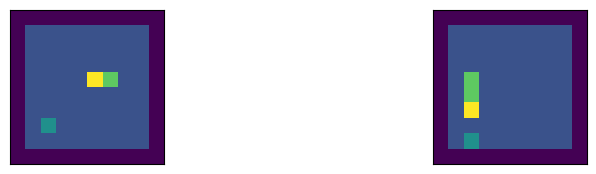

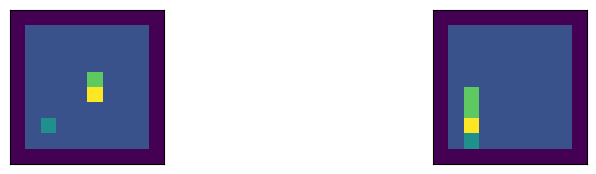

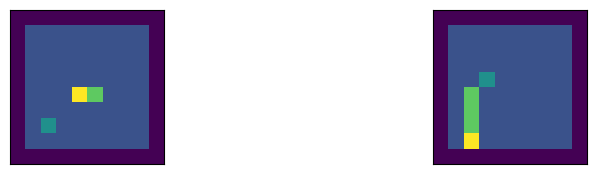

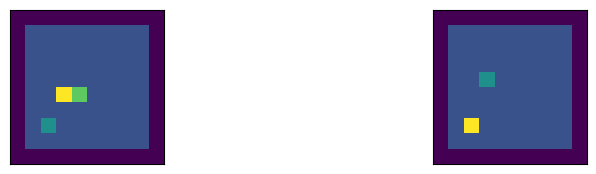

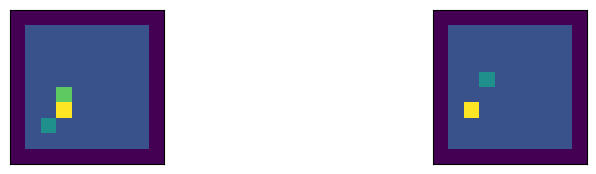

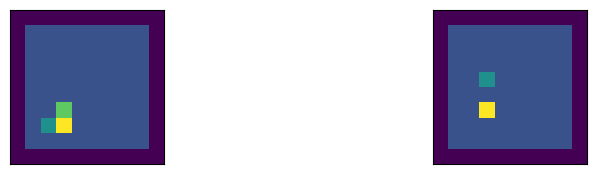

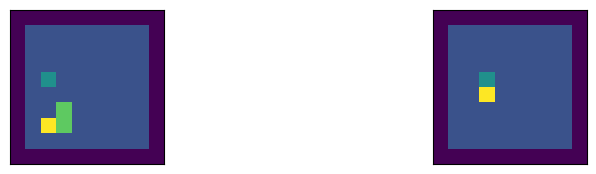

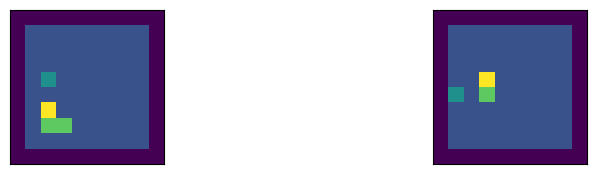

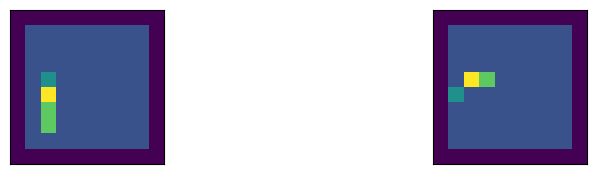

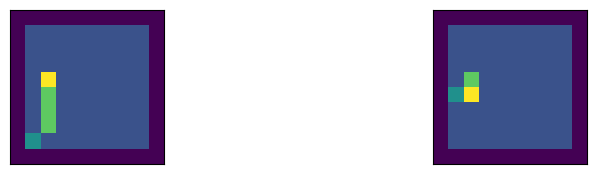

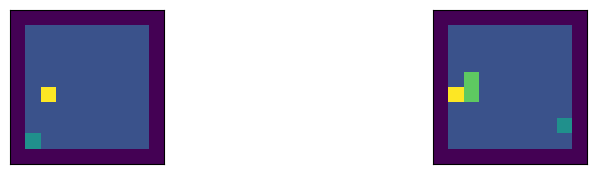

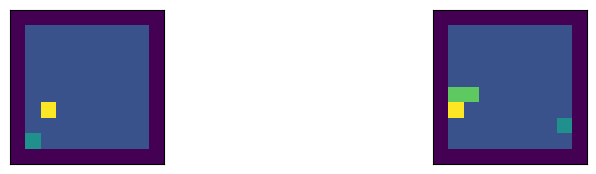

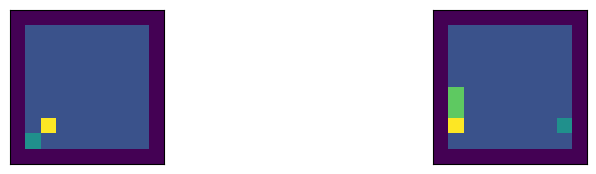

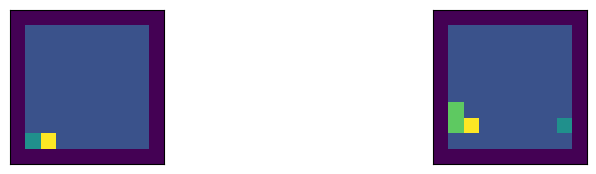

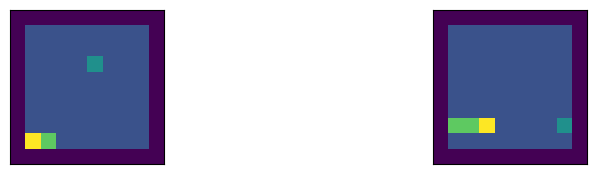

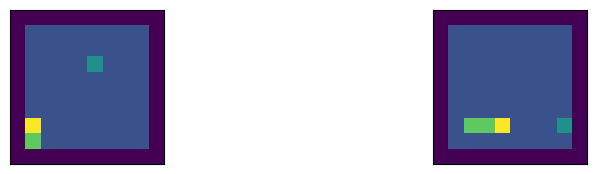

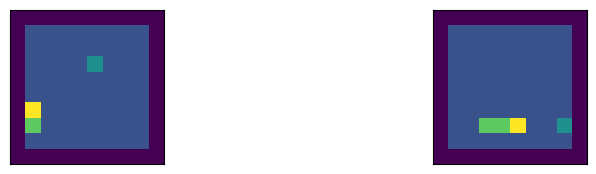

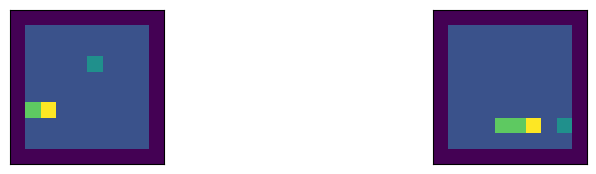

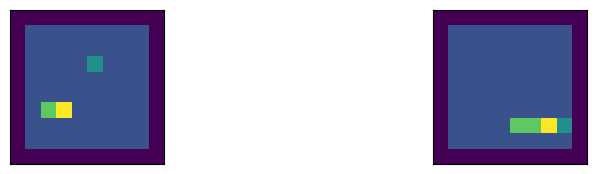

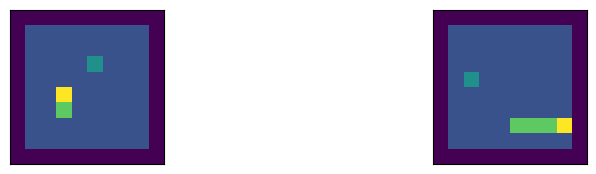

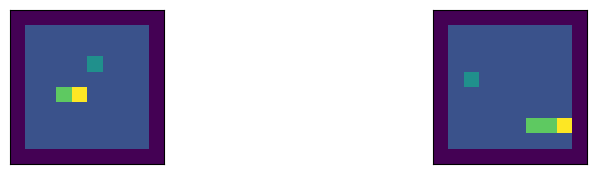

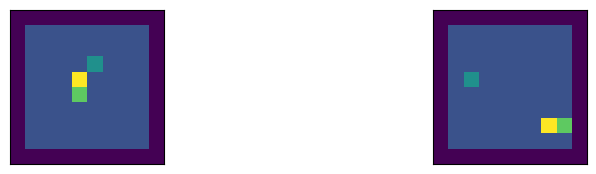

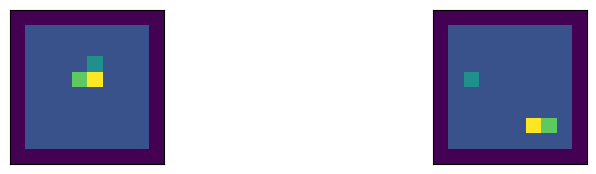

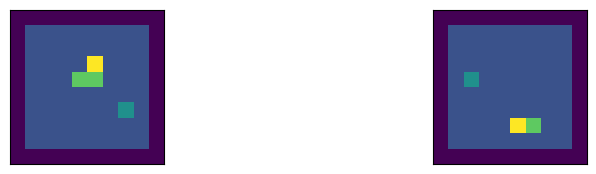

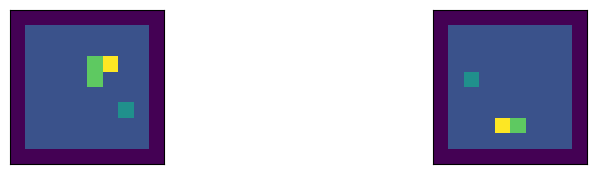

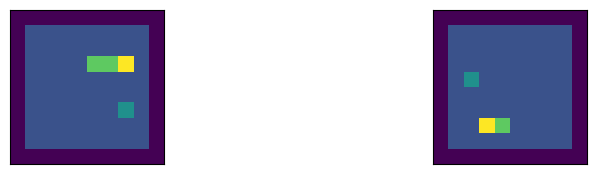

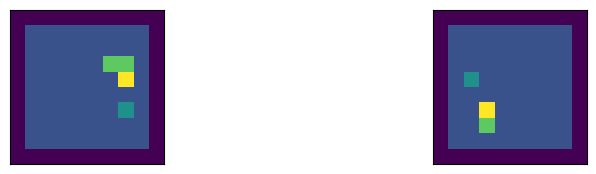

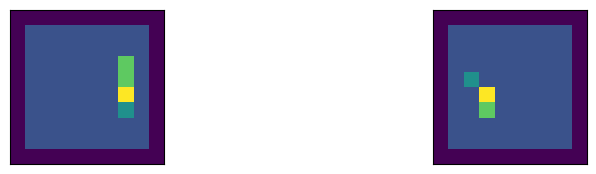

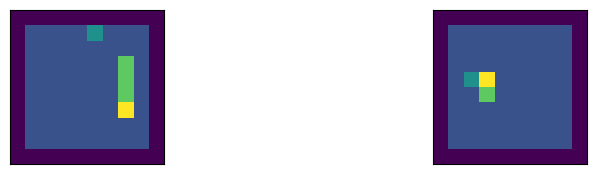

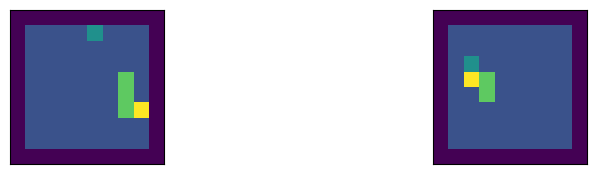

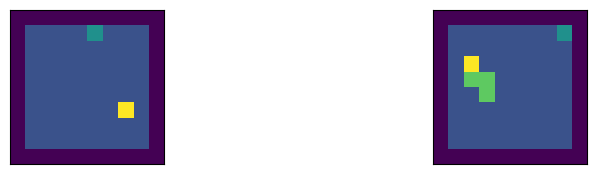

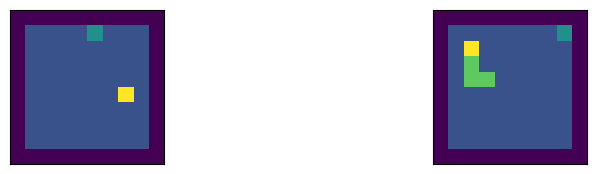

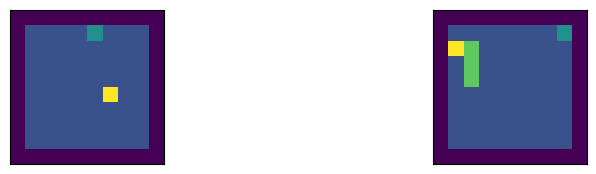

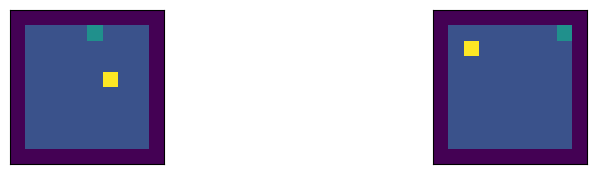

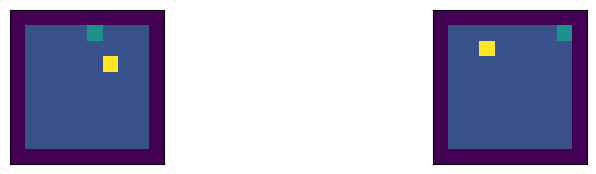

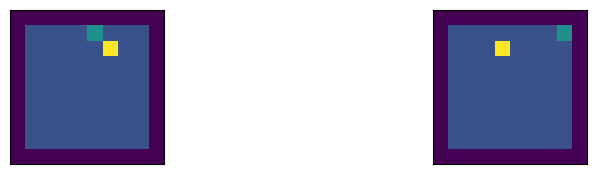

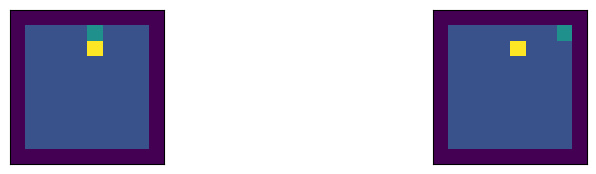

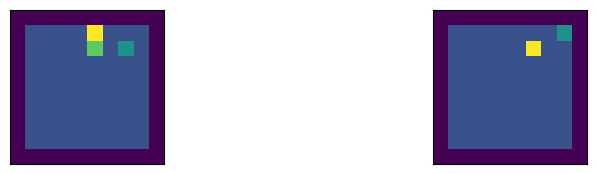

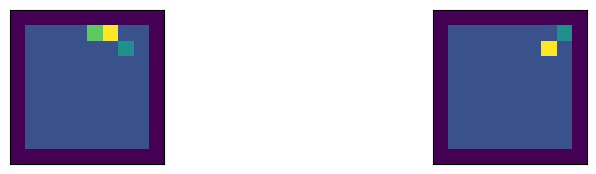

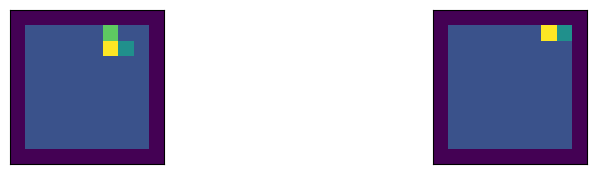

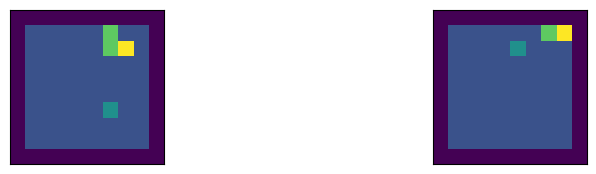

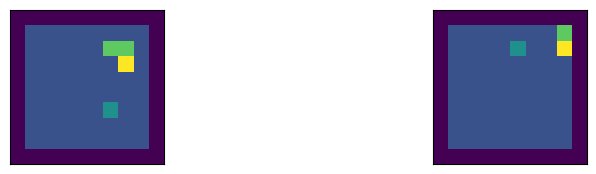

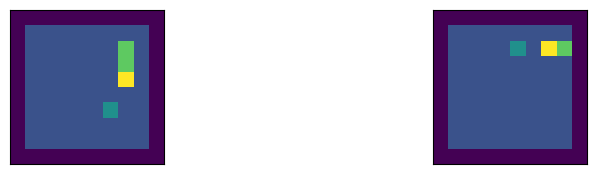

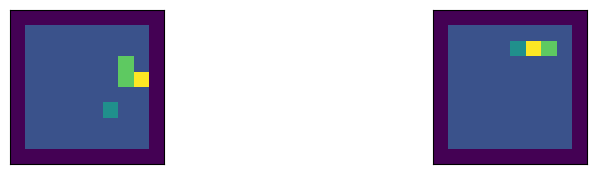

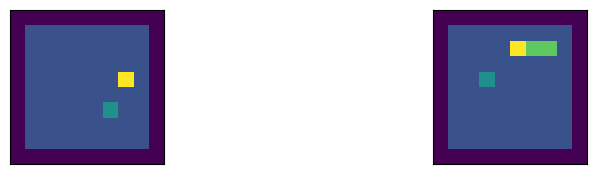

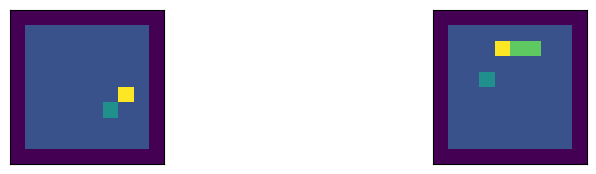

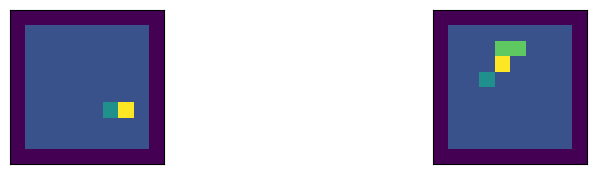

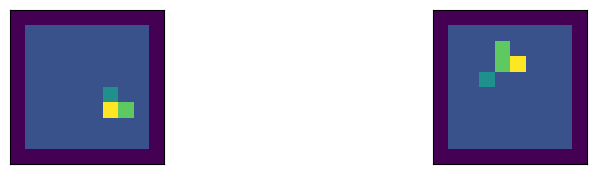

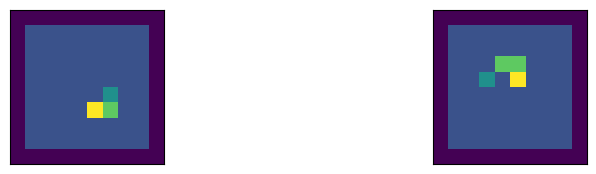

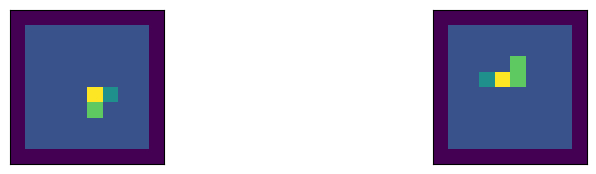

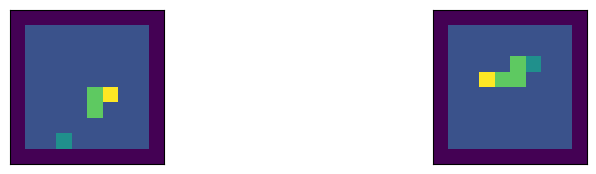

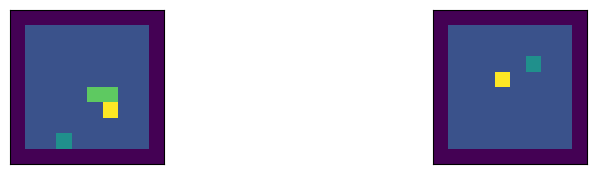

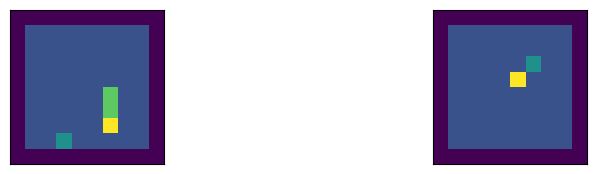

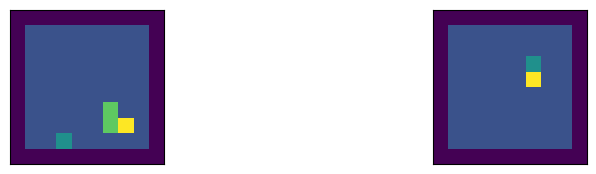

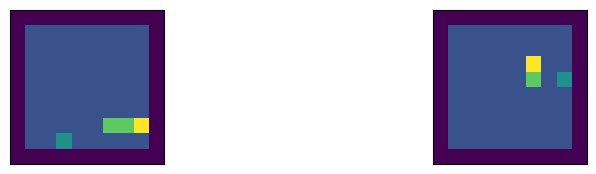

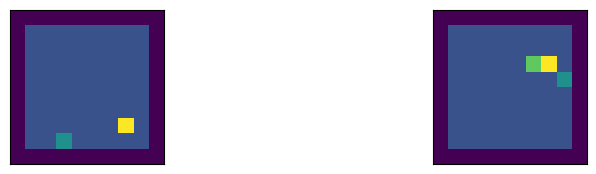

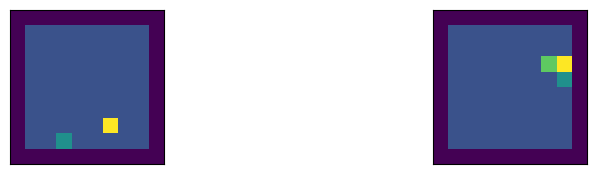

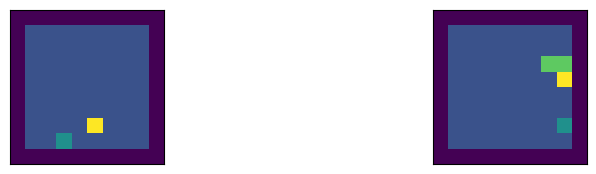

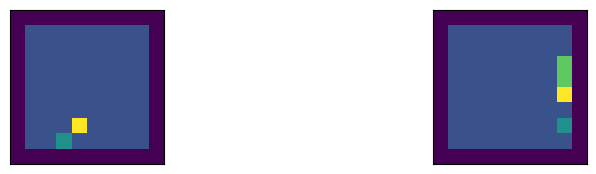

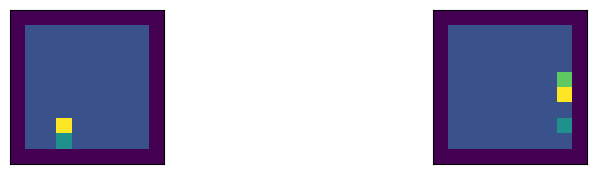

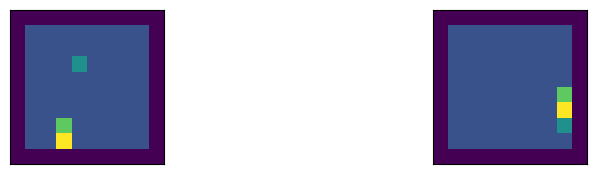

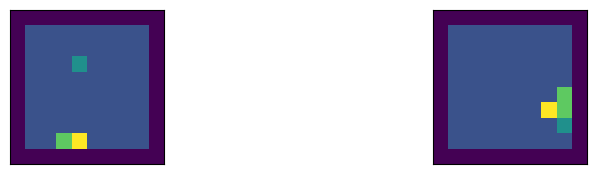

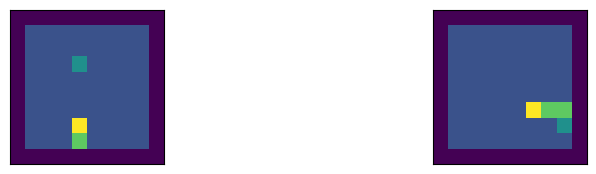

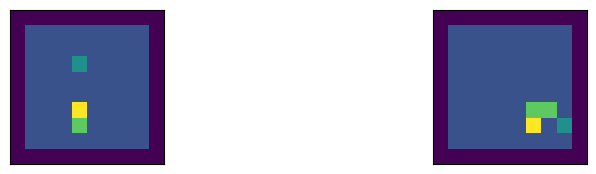

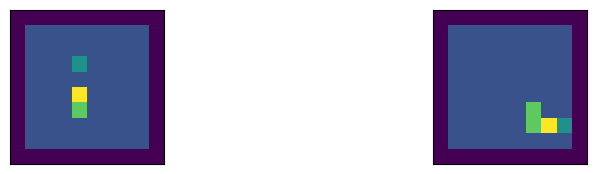

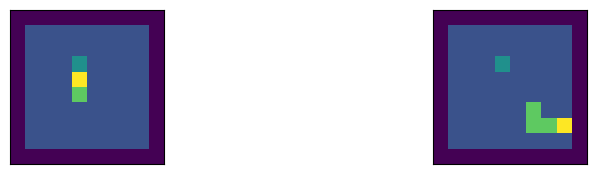

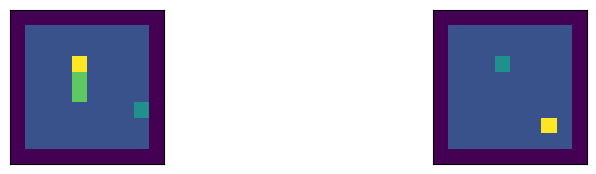

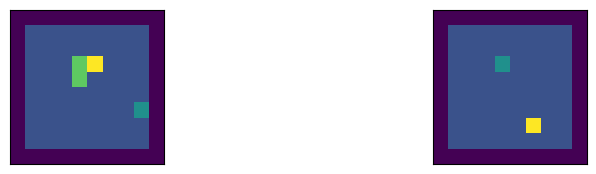

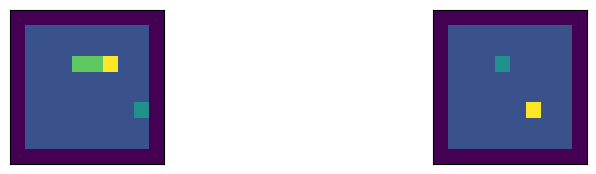

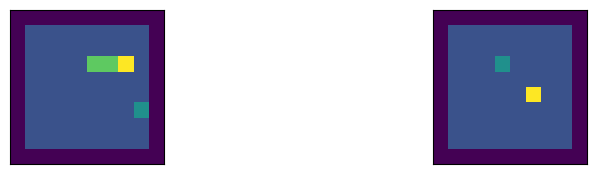

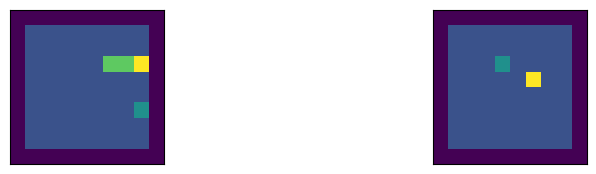

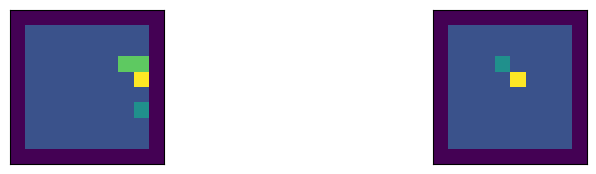

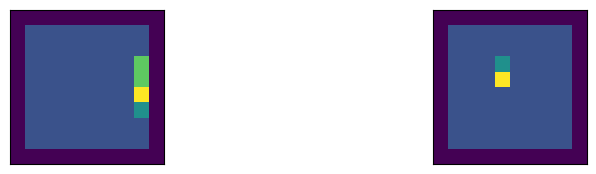

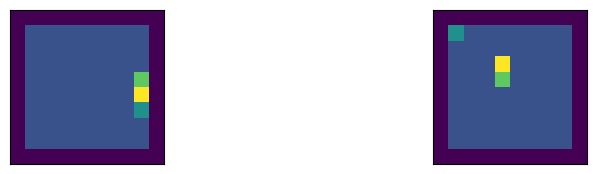

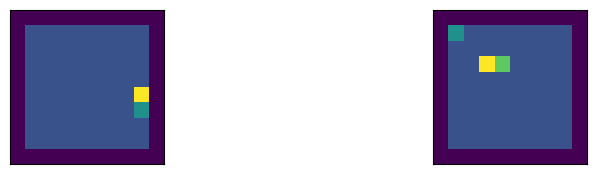

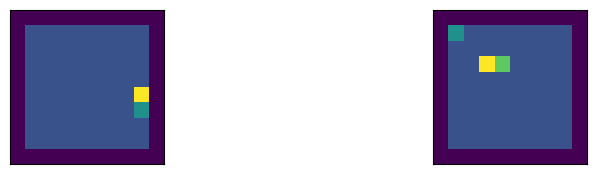

In [ ]:
env_ = get_env(2, size=10)
input_shape = env_.to_state().shape[1:]

GAMMA = .9
ITERATIONS = 100

display_boards(env_, 2)
play(env_,DQN_agent, 100)
# DQN_agent.play(env_, 100)
display_boards(env_, 2)


rewards:  [[7.5 7.5]
 [7.3 7.3]]


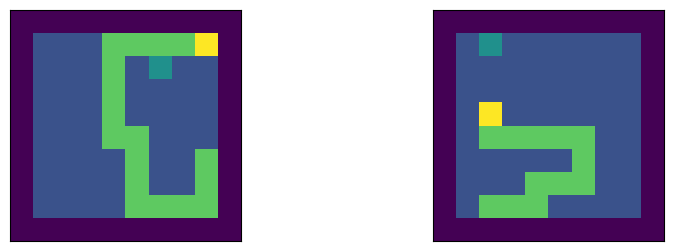

In [ ]:
import AStar_Heuristic

agent = AStar_Heuristic.Heuristic_Agent(env_)
agent.execute(ITERATIONS)


In [ ]:
for iteration in trange(ITERATIONS):
    # get current state of the boards
    state = env_.to_state()
    
    with tf.GradientTape(persistent=True) as tape:
        """ 
        tensor of actions, consider that
            UP = 0
            RIGHT = 1
            DOWN = 2
            LEFT = 3
        """
        actions = [DQN_agent.select_action(state[i]) for i in range(env_.n_boards)]
        rewards = env_.move(actions)
        new_state = tf.constant(env_.to_state())

        # calculate the loss of whichever algorithm you have picked
        loss = ...

    gradient = tape.gradient(..., ...)
    optimizer.apply_gradients(zip(gradient, ...))

  0%|          | 0/100 [00:00<?, ?it/s]


AttributeError: 'DQNAgent' object has no attribute 'select_action'

 ### Random policy reward
 
Just a baseline (not the one you are supposed to develop)

In [ ]:
random_env = get_env(100)
random_rewards = []

for _ in trange(1000):
    probs = tf.convert_to_tensor([[.25]*4]*random_env.n_boards)
    #sample actions
    actions =  tf.random.categorical(tf.math.log(probs), 1, dtype=tf.int32)
    # MDP update
    rewards = random_env.move(actions)
    random_rewards.append(np.mean(rewards))